In [ ]:
df = pd.read_csv("ITEM_ALLOTMENT.csv")


✅ Loaded 'C:\Users\NiveedaMaria\OneDrive - VALUE DRIVEN DATA DMCC\Desktop\RO-Emirates_Post\ITEM_ALLOTMENT.csv' successfully with shape: (94152, 59)


Column,Total_Records,Non-Null_Count,Null_Count,Distinct_Values,Duplicate_Values,Mean,Median,Std_Dev,Min_Value,Max_Value,Distribution_Chart
AWB_NUM,94152,94152,0,94144,8,1.106225e+12,1.100026e+12,2.334690e+11,1000033048519,6000005262892,
PRODUCT_ID,94152,94152,0,7,94145,5.603580e+01,5.600000e+01,8.249149e-01,56,83,
PRODUCT_NAME,94152,94152,0,7,94145,NaN,NaN,NaN,NaN,NaN,
CONTENT_TYPE_ID,94152,94152,0,22,94130,6.394701e+02,6.630000e+02,8.881323e+01,27,810,
CONTENT_TYPE_NAME,94152,94152,0,25,94127,NaN,NaN,NaN,NaN,NaN,
WEIGHT,94152,94152,0,111,94041,5.133192e+02,5.000000e+02,8.437241e+02,40,164100,
HEIGHT,94152,94152,0,8,94144,2.071119e-03,0.000000e+00,9.448899e-02,0,20,
WIDTH,94152,94152,0,6,94146,5.034412e-03,0.000000e+00,3.316145e-01,0,36,
LENGTH,94152,94152,0,7,94145,5.469878e-03,0.000000e+00,3.677673e-01,0,39,
NUM_OF_ITEMS,94152,94152,0,7,94145,1.001370e+00,1.000000e+00,1.399797e-01,1,30,

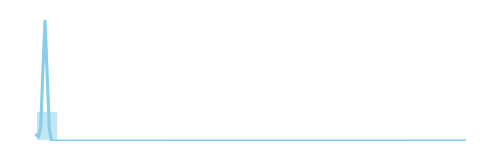
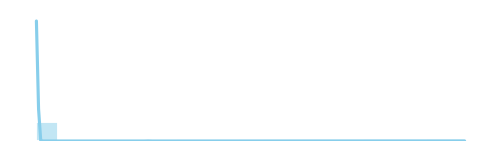
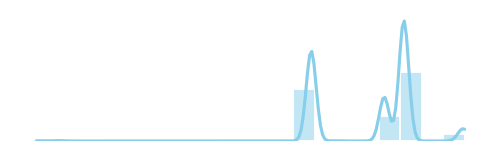
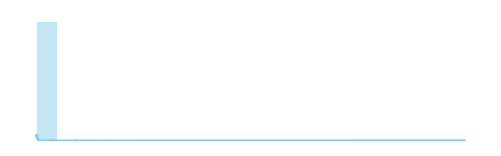
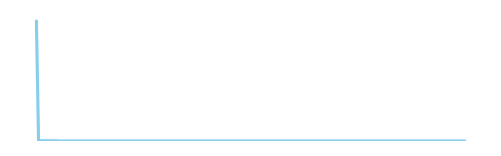
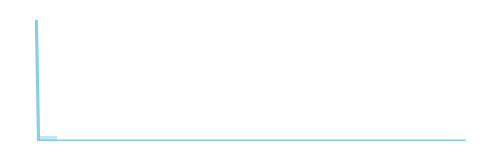
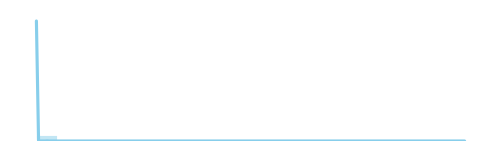
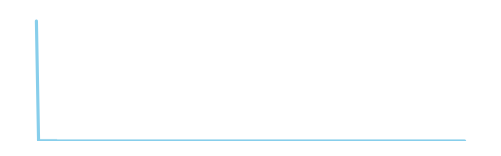
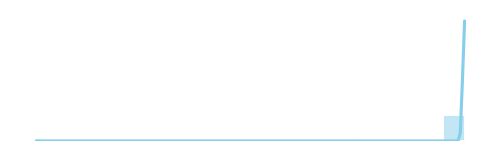
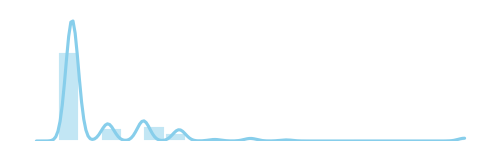
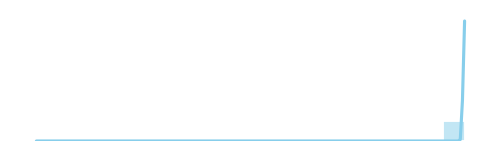
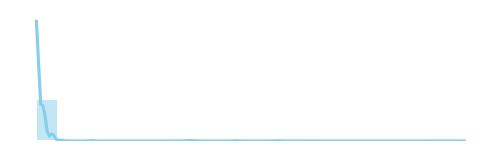
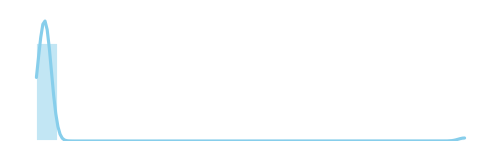
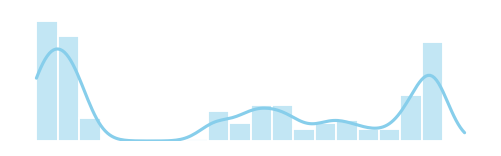
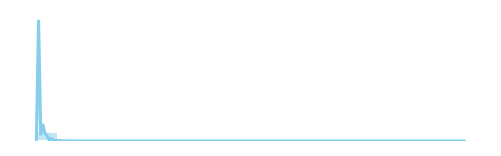
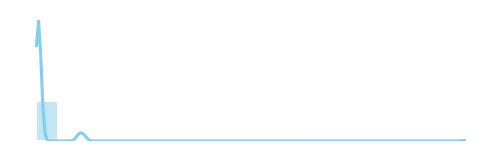
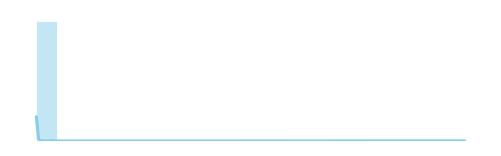
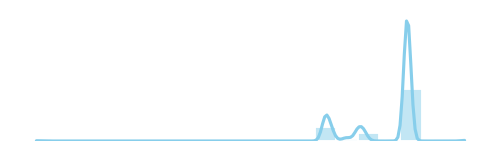
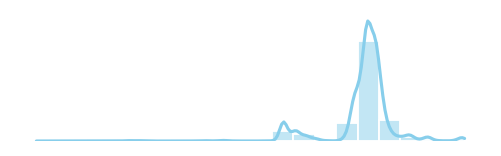
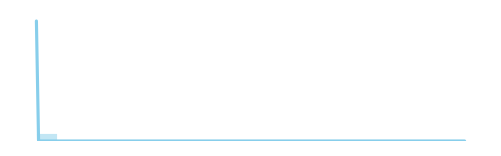
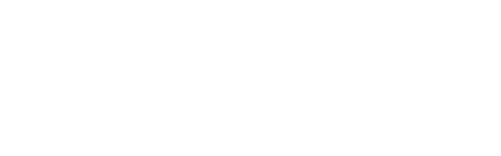
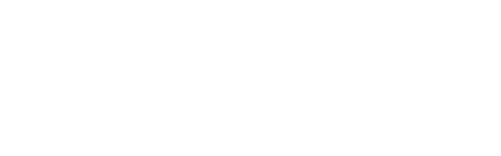
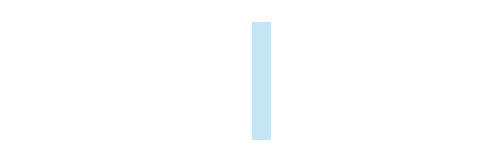

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64
from IPython.display import display, HTML

# ---------- Config: Set your CSV path here ----------
csv_path = 'C:\\Users\\NiveedaMaria\\OneDrive - VALUE DRIVEN DATA DMCC\\Desktop\\RO-Emirates_Post\\ITEM_ALLOTMENT.csv'
# df = pd.read_csv("C:\\Users\\NiveedaMaria\\OneDrive - VALUE DRIVEN DATA DMCC\\Desktop\\RO-Emirates_Post\\ITEM_ALLOTMENT.csv") 
# ----------------------------------------------------

# Load CSV
df = pd.read_csv(csv_path)
print(f"\n✅ Loaded '{csv_path}' successfully with shape: {df.shape}")

# Helper function: Generate base64-encoded histogram
def create_base64_dist_chart(series):
    fig, ax = plt.subplots(figsize=(3.5, 1.2))
    sns.histplot(series.dropna(), kde=True, ax=ax, color='skyblue', bins=20)
    ax.axis('off')
    plt.tight_layout()

    buffer = BytesIO()
    plt.savefig(buffer, format="png", dpi=150, bbox_inches='tight')
    plt.close(fig)
    buffer.seek(0)
    image_base64 = base64.b64encode(buffer.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{image_base64}"/>'

# Summary generation
results = []

for col in df.columns:
    series = df[col]
    total_records = len(series)
    non_null_count = series.count()
    null_count = series.isnull().sum()
    unique_values = series.nunique()
    duplicate_values = total_records - unique_values

    if pd.api.types.is_numeric_dtype(series):
        mean = series.mean()
        median = series.median()
        std_dev = series.std()
        min_val = series.min()
        max_val = series.max()
        dist_chart = create_base64_dist_chart(series)
    else:
        mean = median = std_dev = min_val = max_val = np.nan
        dist_chart = ""

    results.append({
        "Column": col,
        "Total_Records": total_records,
        "Non-Null_Count": non_null_count,
        "Null_Count": null_count,
        "Distinct_Values": unique_values,
        "Duplicate_Values": duplicate_values,
        "Mean": mean,
        "Median": median,
        "Std_Dev": std_dev,
        "Min_Value": min_val,
        "Max_Value": max_val,
        "Distribution_Chart": dist_chart
    })

# Display in HTML with embedded images
summary_df = pd.DataFrame(results)
html_table = summary_df.to_html(escape=False, index=False)
display(HTML(f"<div style='font-family:Arial;font-size:13px'>{html_table}</div>"))
